## Work
請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響

In [1]:
!nvidia-smi

Tue Jul 16 13:15:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128]):
  input_layer = keras.layers.Input(input_shape)
  
  for i, n_units in enumerate(num_neurons):
    if i == 0 :
      x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer' + str(i+1))(input_layer)
      
    else:
      x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer' + str(i+1))(x)
      
  out =keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [out])
  return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [0.1, 0.01, 0.001]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:
# SGD
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
  keras.backend.clear_session() 
  print('Experiment with Learn rate = %.3f' %(lr))
  model = build_mlp(input_shape = x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.SGD(lr = lr, nesterov=True, momentum = MOMENTUM)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  
  model.fit(x_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (x_test, y_test),
           shuffle = True)
  
  # collect result
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = 'exp-LEARNING_RATE-%s' %str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                                      'valid-loss': valid_loss,
                                      'train-acc': train_acc,
                                      'valid-acc': valid_acc}

Experiment with Learn rate = 0.100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

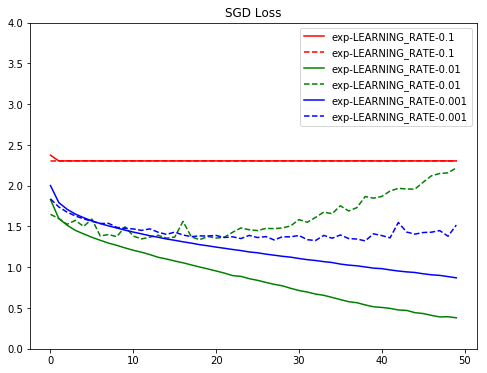

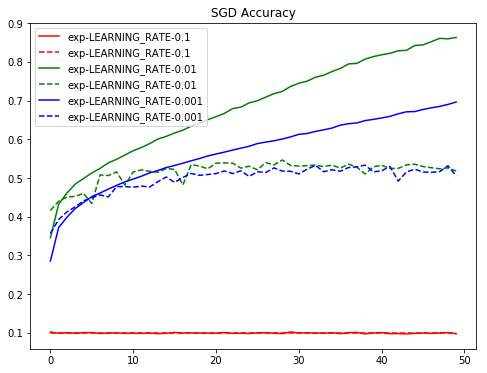

In [11]:
# SGD RESULY
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize = (8,6))
for i , cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-',label = cond, color=color_bar[i])
  plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('SGD Loss')
plt.ylim(0,4)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("SGD Accuracy")
plt.legend()
plt.show()


In [14]:
# ADAGRAD
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
  keras.backend.clear_session() 
  print('Experiment with Learn rate = %.3f' %(lr))
  model = build_mlp(input_shape = x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.Adagrad(lr = lr)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  
  model.fit(x_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (x_test, y_test),
           shuffle = True)
  
  # collect result
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = 'exp-LEARNING_RATE-%s' %str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                                      'valid-loss': valid_loss,
                                      'train-acc': train_acc,
                                      'valid-acc': valid_acc}

Experiment with Learn rate = 0.100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

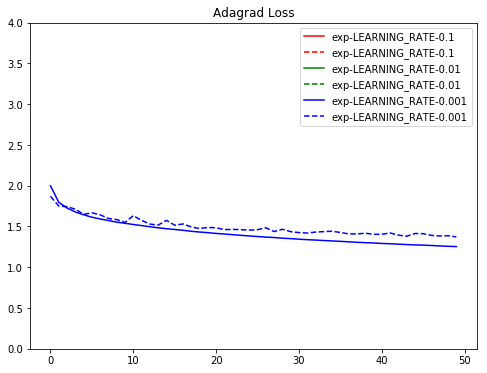

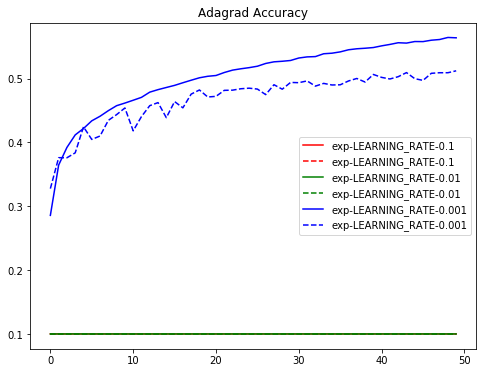

In [17]:
# Adagrad RESULY
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize = (8,6))
for i , cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-',label = cond, color=color_bar[i])
  plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('Adagrad Loss')
plt.ylim(0,4)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad Accuracy")
plt.legend()
plt.show()

In [20]:
# RMSPROP
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
  keras.backend.clear_session() 
  print('Experiment with Learn rate = %.3f' %(lr))
  model = build_mlp(input_shape = x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.RMSprop(lr = lr)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  
  model.fit(x_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (x_test, y_test),
           shuffle = True)
  
  # collect result
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = 'exp-LEARNING_RATE-%s' %str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                                      'valid-loss': valid_loss,
                                      'train-acc': train_acc,
                                      'valid-acc': valid_acc}

Experiment with Learn rate = 0.100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

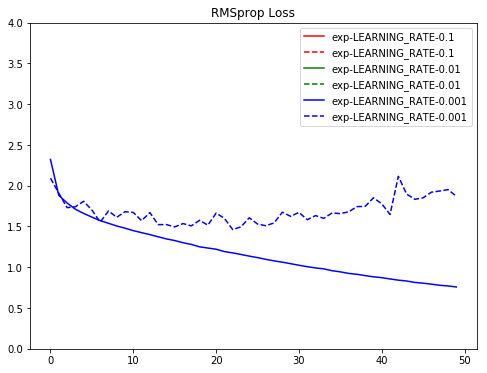

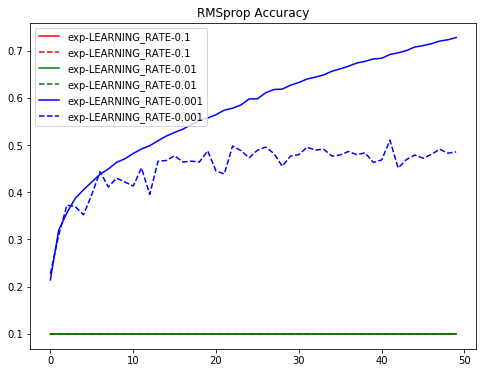

In [21]:
# RMSPROP RESULY
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize = (8,6))
for i , cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-',label = cond, color=color_bar[i])
  plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('RMSprop Loss')
plt.ylim(0,4)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop Accuracy")
plt.legend()
plt.show()

In [24]:
# Adam
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
  keras.backend.clear_session() 
  print('Experiment with Learn rate = %.3f' %(lr))
  model = build_mlp(input_shape = x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.Adam(lr = lr)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  
  model.fit(x_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (x_test, y_test),
           shuffle = True)
  
  # collect result
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = 'exp-LEARNING_RATE-%s' %str(lr)
  results[exp_name_tag] = {'train-loss': train_loss,
                                      'valid-loss': valid_loss,
                                      'train-acc': train_acc,
                                      'valid-acc': valid_acc}

Experiment with Learn rate = 0.100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=======================

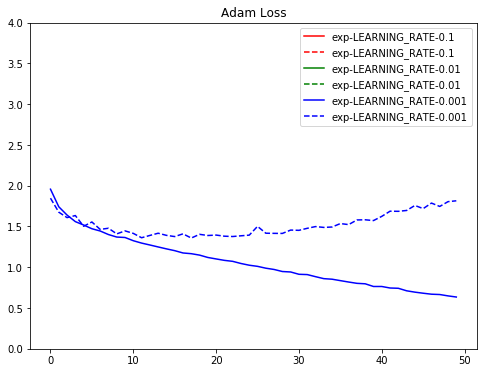

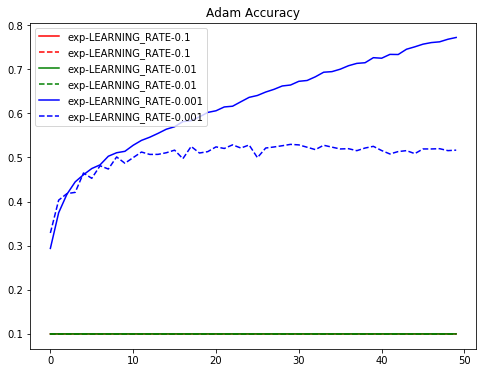

In [25]:
# Adam RESULY
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize = (8,6))
for i , cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-',label = cond, color=color_bar[i])
  plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('Adam Loss')
plt.ylim(0,4)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adam Accuracy")
plt.legend()
plt.show()

### Too Large Momentum Harm The Result